In [1]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [3]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [4]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df['file_name'] = df.index.map(lambda x: files_idx[files.index(x)])
df['file_name_string'] = df.index
df.reset_index(inplace=True, drop=True)

In [5]:
df['unique_index'] = df.index

In [6]:
df_copy = df
df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
df_best['pitch_diff'] = df_best['pitch'].diff().abs()
df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)

/var/folders/cr/fk05n77x7l59vt1zwmvrl4yc0000gn/T/ipykernel_32736/3878040909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

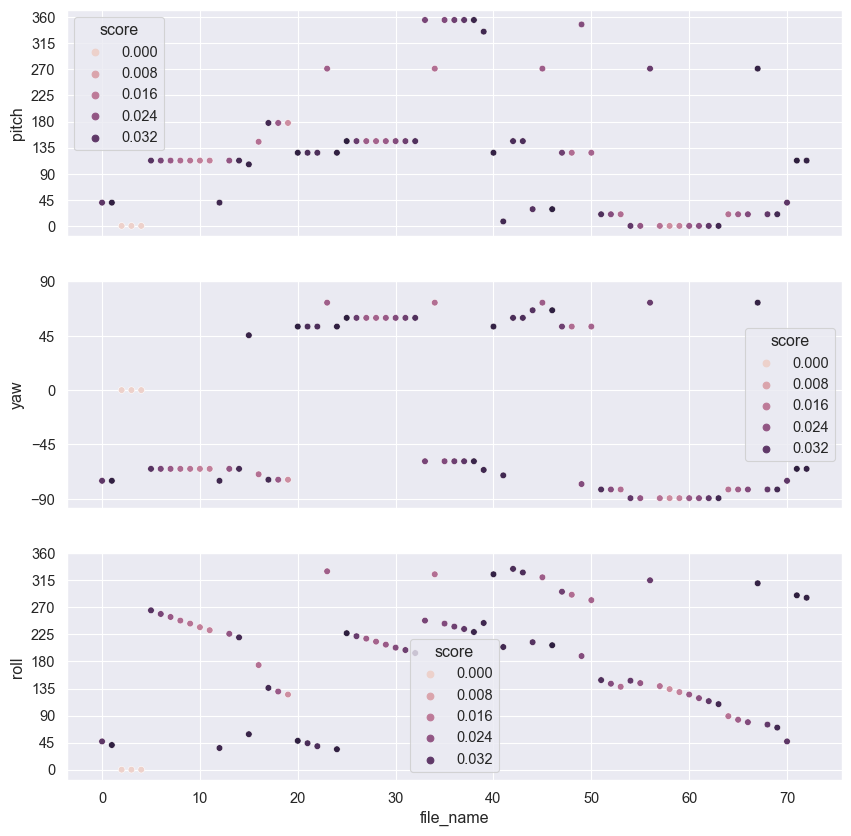

In [7]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [8]:
df_copy.sort_values(by='max_val').groupby('file_name').last()

,rotation,max_val,rotation_reverse,max_val_reverse,translation,x,y,z,score,reversed_diff,...,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse,file_name_string,unique_index
file_name,,,,,,,,,,,,,,,,,,,,,
0,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",135.856650,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",134.183864,"x: 0.65, y: -0.17, z: 17.69",0.646654,-0.167369,17.692318,0.032152,-1.672785,...,rb,47,40.124,-75.15,rb,47,40.124,-75.15,0.png,20
1,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",134.018362,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",132.389336,"x: 0.63, y: -0.22, z: 17.67",0.630524,-0.220304,17.666687,0.039018,-1.629026,...,rb,41,40.124,-75.15,rb,41,40.124,-75.15,1.png,52
2,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000,0.00,0,0,0.000,0.00,10.png,53
3,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000,0.00,0,0,0.000,0.00,11.png,54
4,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000,0.00,0,0,0.000,0.00,12.png,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",135.481209,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",134.095822,"x: 0.66, y: -0.05, z: 17.61",0.658952,-0.053019,17.614319,0.031568,-1.385387,...,rb,75,20.062,-82.35,rb,75,20.062,-82.35,70.png,1574
69,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",138.543711,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",137.237031,"x: 0.65, y: -0.11, z: 17.59",0.650648,-0.105919,17.594582,0.036162,-1.306680,...,rb,70,20.062,-82.35,rb,70,20.062,-82.35,71.png,1613
70,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",135.856650,"pitch/theta/X: 40.12, yaw/phi/Y: -75.15, roll/...",134.183864,"x: 0.65, y: -0.17, z: 17.69",0.646654,-0.167369,17.692318,0.032152,-1.672785,...,rb,47,40.124,-75.15,rb,47,40.124,-75.15,72.png,1639


In [9]:
# while True:
#     df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
#     df_best['pitch_diff'] = df_best['pitch'].diff().abs()
#     df_best.iloc[0]['pitch_diff'] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
#     df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)
#
#     if df_best['pitch_diff'].max() < 40:
#         break
#     else:
#         # find the first index which has pitch_diff > 40
#         # idx = df_best[df_best['pitch_diff'] > 40].index[0]
#         idx = df_best['pitch_diff'].idxmax()
#         unique = df_best.loc[idx]['unique_index']
#         df_copy = df_copy.drop(unique)

In [10]:
len(df_best.index.unique())

73

In [11]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['file_name_string', 'score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z', 'channel', 'max_val']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

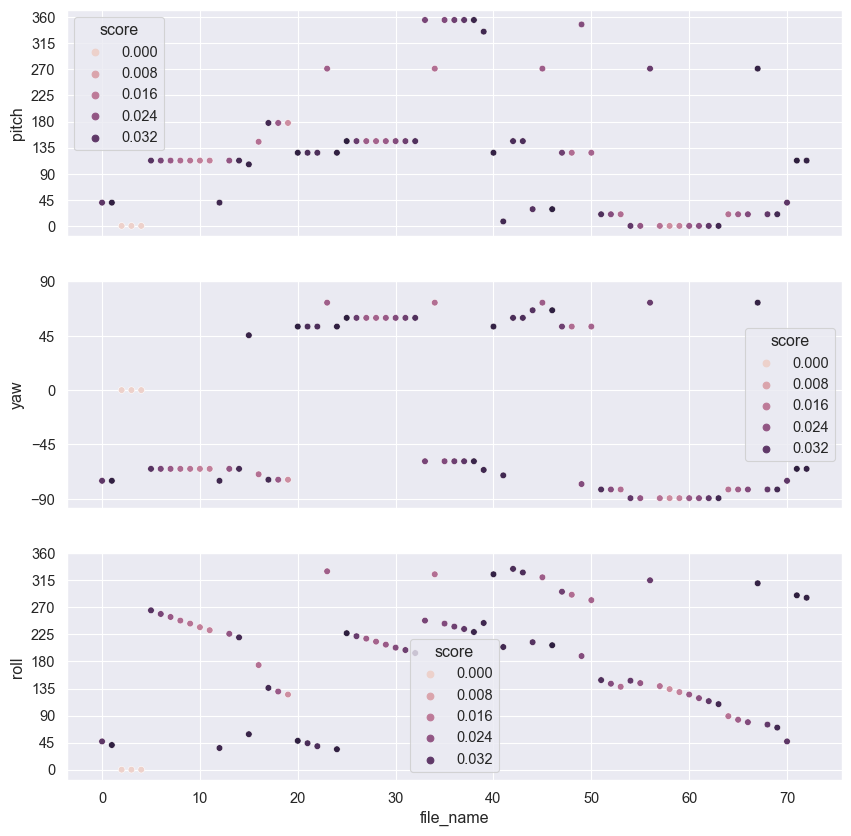

In [12]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [13]:
df_small['roll'].diff().describe()

count     72.000000
mean       3.319444
std      104.003362
min     -296.000000
25%       -6.000000
50%       -5.000000
75%        0.000000
max      291.000000
Name: roll, dtype: float64

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


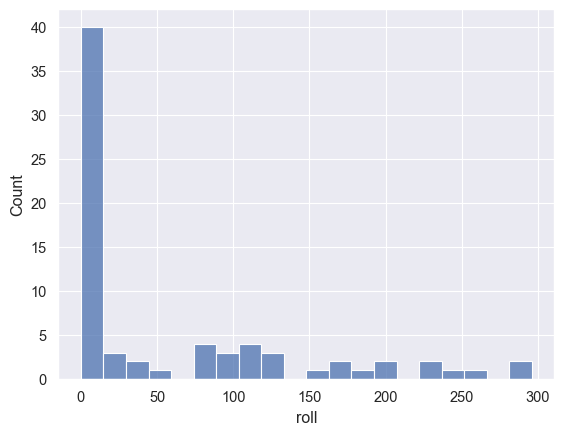

In [14]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [15]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")

In [98]:
import cv2 as cv

In [176]:
# go trough all files in folder and according to the channel in df_small replace the file with only the channel
dir = 'matching images roll'
for file in os.listdir(dir):
    try:
        if file.endswith('.png'):
            channel = df_small['channel'][int(file[:file.find('.')])]
            img = cv.imread(dir + "/" + file)
            blue_channel, green_channel, red_channel = cv.split(img)
            if channel == "rgb":
                img = cv.add(red_channel, cv.add(blue_channel, green_channel))
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rg":
                img = cv.add(red_channel, green_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rb":
                img = cv.add(red_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "gb":
                img = cv.add(green_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
    except:
        print("could not find file " + file)
